In [1]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import shutil
import os
from zipfile import ZipFile
from tensorflow import data as tf_data
from tensorflow.keras.optimizers.legacy import Adam
import keras
from keras import layers

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# first dataset

In [3]:
if os.path.exists('fer2013.zip')==False:
    !kaggle datasets download -d msambare/fer2013
else:
  print('fer2013.zip is already downloaded')
with ZipFile('fer2013.zip', 'r') as zf:
  zf.extractall()

fer2013.zip is already downloaded


In [4]:
path = "/content/train/"
fileList=os.listdir(path)
print(50*'*','Training files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))
path = "/content/test/"
fileList=os.listdir(path)
print(50*'*','Testing files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))

************************************************** Training files **************************************************
anger: 8171
sad: 9168
surprise: 8041
disgust: 436
fear: 8297
neutral: 11324
angry: 3995
happy: 14033
************************************************** Testing files **************************************************
sad: 1247
surprise: 831
disgust: 111
fear: 1024
neutral: 1233
angry: 958
happy: 1774


In [5]:
# second dataset

In [6]:
if os.path.exists('affectnet-training-data.zip')==False:
  !kaggle datasets download -d noamsegal/affectnet-training-data
else:
  print('affectnet-training-data.zip is already downloaded')
with ZipFile('affectnet-training-data.zip', 'r') as zf:
  zf.extractall('train')

affectnet-training-data.zip is already downloaded


In [7]:
os.remove('train/labels.csv')

In [8]:
path = "/content/train/"
fileList=os.listdir(path)
print(50*'*','Training files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))
path = "/content/test/"
fileList=os.listdir(path)
print(50*'*','Testing files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))

************************************************** Training files **************************************************
contempt: 2871
anger: 8171
sad: 9168
surprise: 8041
disgust: 2913
fear: 8297
neutral: 11324
angry: 3995
happy: 14033
************************************************** Testing files **************************************************
sad: 1247
surprise: 831
disgust: 111
fear: 1024
neutral: 1233
angry: 958
happy: 1774


In [9]:
# shutil.rmtree('/content/train', ignore_errors=False, onerror=None)
# shutil.rmtree('/content/test', ignore_errors=False, onerror=None)

In [10]:
for root, dirs, files in os.walk('test'):
        for file in files:
            # Construct the full file paths
            source_file = os.path.join(root, file)
            relative_path = os.path.relpath(source_file, 'test')
            destination_file = os.path.join('train', relative_path)

            # Ensure the destination directory exists
            destination_dir_path = os.path.dirname(destination_file)
            os.makedirs(destination_dir_path, exist_ok=True)

            # Move the file, overwriting if it already exists
            shutil.move(source_file, destination_file)
            print(f"Moved: {source_file} to {destination_file}")

Streaming output truncated to the last 5000 lines.
Moved: test/disgust/PublicTest_9727119.jpg to train/disgust/PublicTest_9727119.jpg
Moved: test/disgust/PrivateTest_26306320.jpg to train/disgust/PrivateTest_26306320.jpg
Moved: test/disgust/PublicTest_86888698.jpg to train/disgust/PublicTest_86888698.jpg
Moved: test/disgust/PrivateTest_79216084.jpg to train/disgust/PrivateTest_79216084.jpg
Moved: test/disgust/PublicTest_37923555.jpg to train/disgust/PublicTest_37923555.jpg
Moved: test/disgust/PublicTest_97476336.jpg to train/disgust/PublicTest_97476336.jpg
Moved: test/disgust/PublicTest_30164595.jpg to train/disgust/PublicTest_30164595.jpg
Moved: test/disgust/PublicTest_85498443.jpg to train/disgust/PublicTest_85498443.jpg
Moved: test/disgust/PrivateTest_19671520.jpg to train/disgust/PrivateTest_19671520.jpg
Moved: test/disgust/PrivateTest_6783917.jpg to train/disgust/PrivateTest_6783917.jpg
Moved: test/disgust/PrivateTest_79831191.jpg to train/disgust/PrivateTest_79831191.jpg
Moved: t

In [11]:
def move_images(source_dir, destination_dir):
    # Walk through the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            # Construct the full file paths
            source_file = os.path.join(root, file)
            relative_path = os.path.relpath(source_file, source_dir)
            destination_file = os.path.join(destination_dir, relative_path)

            # Ensure the destination directory exists
            destination_dir_path = os.path.dirname(destination_file)
            os.makedirs(destination_dir_path, exist_ok=True)

            # Move the file, overwriting if it already exists
            shutil.move(source_file, destination_file)
            print(f"Moved: {source_file} to {destination_file}")

# Define your source and destination directories
source_directory = 'test'
destination_directory = 'train'

# Call the function to move images
move_images(source_directory, destination_directory)

In [12]:
def merge_folders(source_folder, destination_folder):
    # Check if the source folder exists
    if not os.path.exists(source_folder):
        print(f"Source folder '{source_folder}' does not exist.")
        return

    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Move files from source to destination
    for filename in os.listdir(source_folder):
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)

        if os.path.isfile(source_file):
            # Move the file
            shutil.move(source_file, destination_file)
            print(f"Moved: {source_file} to {destination_file}")

    # Remove the source folder if empty
    try:
        os.rmdir(source_folder)
        print(f"Removed empty folder: {source_folder}")
    except OSError as e:
        print(f"Error removing folder {source_folder}: {e}")

# Define your source and destination folders
source_folder = 'train/angry'
destination_folder = 'train/anger'

# Call the function to merge folders
merge_folders(source_folder, destination_folder)

Moved: train/angry/PrivateTest_68625027.jpg to train/anger/PrivateTest_68625027.jpg
Moved: train/angry/PrivateTest_39621454.jpg to train/anger/PrivateTest_39621454.jpg
Moved: train/angry/PrivateTest_13664224.jpg to train/anger/PrivateTest_13664224.jpg
Moved: train/angry/PrivateTest_46244877.jpg to train/anger/PrivateTest_46244877.jpg
Moved: train/angry/Training_29857623.jpg to train/anger/Training_29857623.jpg
Moved: train/angry/Training_31442578.jpg to train/anger/Training_31442578.jpg
Moved: train/angry/Training_13790669.jpg to train/anger/Training_13790669.jpg
Moved: train/angry/PrivateTest_98403294.jpg to train/anger/PrivateTest_98403294.jpg
Moved: train/angry/PrivateTest_1290484.jpg to train/anger/PrivateTest_1290484.jpg
Moved: train/angry/Training_87246740.jpg to train/anger/Training_87246740.jpg
Moved: train/angry/Training_88391908.jpg to train/anger/Training_88391908.jpg
Moved: train/angry/Training_19633287.jpg to train/anger/Training_19633287.jpg
Moved: train/angry/Training_31

In [13]:
path = "/content/train/"
fileList=os.listdir(path)
print(50*'*','Training files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))
path = "/content/test/"
fileList=os.listdir(path)
print(50*'*','Testing files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))

************************************************** Training files **************************************************
contempt: 2871
anger: 8171
sad: 9168
surprise: 8041
disgust: 3024
fear: 8297
neutral: 11324
happy: 14033
************************************************** Testing files **************************************************
sad: 0
surprise: 0
disgust: 0
fear: 0
neutral: 0
angry: 0
happy: 0


In [14]:
shutil.rmtree('/content/train/disgust', ignore_errors=False, onerror=None)
shutil.rmtree('/content/train/contempt', ignore_errors=False, onerror=None)

In [15]:
path = "/content/train/"
fileList=os.listdir(path)
print(50*'*','Training files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))
path = "/content/test/"
fileList=os.listdir(path)
print(50*'*','Testing files',50*'*')
for folder in fileList:
  print(f'{folder}:',len(os.listdir(f'{path}/{folder}')))

************************************************** Training files **************************************************
anger: 8171
sad: 9168
surprise: 8041
fear: 8297
neutral: 11324
happy: 14033
************************************************** Testing files **************************************************
sad: 0
surprise: 0
disgust: 0
fear: 0
neutral: 0
angry: 0
happy: 0


In [25]:
image_size = (48, 48)
batch_size = 128

# train_datagen = ImageDataGenerator(
#     width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
#     height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
#     horizontal_flip = True,         # Flip images horizontally at random
#     rescale = 1./255,               # Rescale pixel values to be between 0 and 1
#     validation_split = 0.2          # Set aside 20% of the data for validation
# )

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "train",
    validation_split=0.1,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='categorical'
)

Found 59034 files belonging to 6 classes.
Using 53131 files for training.
Using 5903 files for validation.


In [26]:
# data_augmentation_layers = [
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
# ]


# def data_augmentation(images):
#     for layer in data_augmentation_layers:
#         images = layer(images)
#     return images
# # Apply `data_augmentation` to the training images.
# train_ds = train_ds.map(
#     lambda img, label: (data_augmentation(img), label),
#     num_parallel_calls=tf_data.AUTOTUNE,
# )
# # Prefetching samples in GPU memory helps maximize GPU utilization.
# train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
# val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [27]:
# create model structure
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# cv2.ocl.setUseOpenCL(False)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    metrics=['accuracy']
    )

In [28]:
# Train the neural network/model
model_info = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds
    )
# save model structure in jason file
model_json = model.to_json()
with open("final_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('final_weights.h5')

Epoch 1/50
416/416 [==============================] - 20s 46ms/step - loss: 2.2102 - accuracy: 0.2175 - val_loss: 1.7208 - val_accuracy: 0.2594
Epoch 2/50
416/416 [==============================] - 17s 40ms/step - loss: 1.7050 - accuracy: 0.2681 - val_loss: 1.5683 - val_accuracy: 0.3424
Epoch 3/50
416/416 [==============================] - 16s 38ms/step - loss: 1.6030 - accuracy: 0.3334 - val_loss: 1.4864 - val_accuracy: 0.3898
Epoch 4/50
416/416 [==============================] - 16s 39ms/step - loss: 1.5110 - accuracy: 0.3880 - val_loss: 1.3751 - val_accuracy: 0.4618
Epoch 5/50
416/416 [==============================] - 17s 40ms/step - loss: 1.4235 - accuracy: 0.4296 - val_loss: 1.2805 - val_accuracy: 0.5033
Epoch 6/50
416/416 [==============================] - 17s 41ms/step - loss: 1.3503 - accuracy: 0.4618 - val_loss: 1.2264 - val_accuracy: 0.5257
Epoch 7/50
416/416 [==============================] - 16s 38ms/step - loss: 1.2868 - accuracy: 0.4911 - val_loss: 1.1834 - val_accuracy:

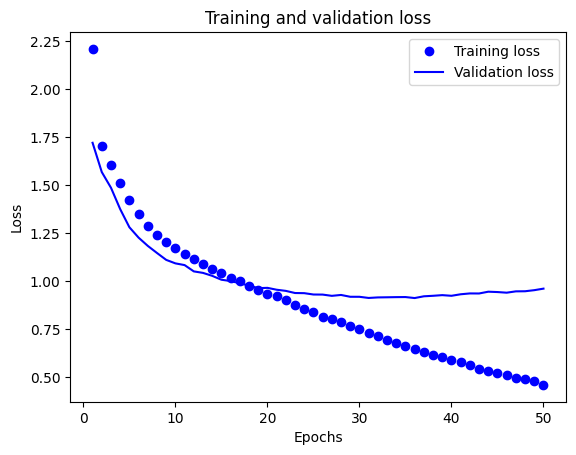

In [29]:
# Plot the train and validation loss
train_loss = model_info.history['loss']
val_loss = model_info.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

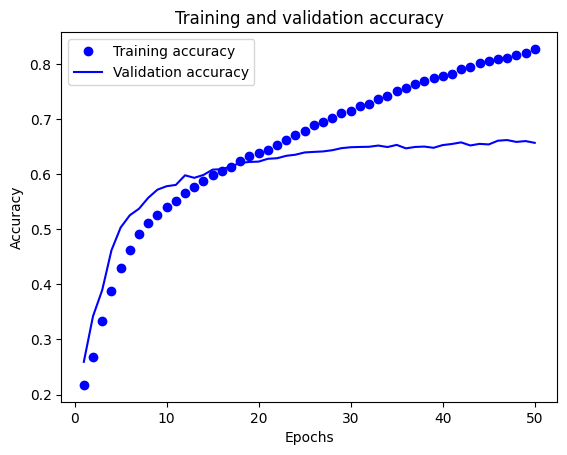

In [30]:
# Plot the train and validation accuracy
train_acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()